In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the dataset
test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
EId = test["Emp_ID"]
TEId = df["Emp_ID"]


In [3]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [5]:
df = df.drop_duplicates(subset="Emp_ID")

In [6]:
df = df.drop(["LastWorkingDate"], axis = 1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,2381060,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,0,1
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,1,1,0,1
13,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,3,3,0,1


In [7]:
df = df.rename(columns = {'MMM-YY': 'Reporting_Date'}, inplace = False)
df = df.rename(columns = {'Total Business Value': 'Total_Business_Value'}, inplace = False)

In [8]:
df['Reporting_Date'] = pd.to_datetime(df['Reporting_Date'], format='%Y-%m-%d')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%Y-%m-%d')

In [9]:
df.dtypes

Reporting_Date          datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Total_Business_Value             int64
Quarterly Rating                 int64
dtype: object

In [10]:
df['Male'] = df['Gender'].map( {'Male':1, 'Female':0} )
df[['Gender', 'Male']]
df = df.drop(["Gender"], axis = 1)

In [11]:
df

,Reporting_Date,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male
0,2016-01-01,1,28,C23,Master,57387,2015-12-24,1,1,2381060,2,1
3,2017-11-01,2,31,C7,Master,67016,2017-11-06,2,2,0,1,1
5,2016-12-01,4,43,C13,Master,65603,2016-12-07,2,2,0,1,1
10,2016-01-01,5,29,C9,College,46368,2016-01-09,1,1,0,1,1
13,2017-08-01,6,31,C11,Bachelor,78728,2017-07-31,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2016-01-01,2784,33,C24,College,82815,2012-10-15,2,3,1226590,3,1
19079,2017-08-01,2785,34,C9,College,12105,2017-08-28,1,1,0,1,0
19082,2016-01-01,2786,44,C19,College,35370,2015-07-31,2,2,221080,2,1
19091,2016-01-01,2787,28,C20,Master,69498,2015-07-21,1,1,408090,2,0


<AxesSubplot:xlabel='City', ylabel='count'>

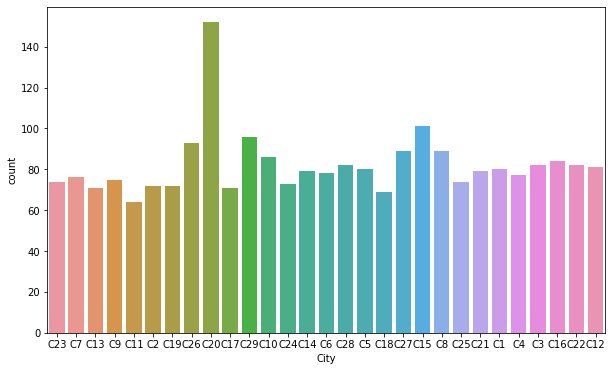

In [12]:
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df,x='City')

In [13]:
from sklearn.preprocessing import LabelEncoder
df['City'] = LabelEncoder().fit_transform(df['City'])
encoder = LabelEncoder()
encoder.fit(df['City'])
encoder.classes_
df['City'] = encoder.transform(df['City'])
df

,Reporting_Date,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male
0,2016-01-01,1,28,15,Master,57387,2015-12-24,1,1,2381060,2,1
3,2017-11-01,2,31,26,Master,67016,2017-11-06,2,2,0,1,1
5,2016-12-01,4,43,4,Master,65603,2016-12-07,2,2,0,1,1
10,2016-01-01,5,29,28,College,46368,2016-01-09,1,1,0,1,1
13,2017-08-01,6,31,2,Bachelor,78728,2017-07-31,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2016-01-01,2784,33,16,College,82815,2012-10-15,2,3,1226590,3,1
19079,2017-08-01,2785,34,28,College,12105,2017-08-28,1,1,0,1,0
19082,2016-01-01,2786,44,10,College,35370,2015-07-31,2,2,221080,2,1
19091,2016-01-01,2787,28,12,Master,69498,2015-07-21,1,1,408090,2,0


In [14]:
df['Education_Level'] = df['Education_Level'].map( {'College':0, 'Bachelor':1, 'Master':2})

In [15]:
df.dtypes

Reporting_Date          datetime64[ns]
Emp_ID                           int64
Age                              int64
City                             int64
Education_Level                  int64
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Total_Business_Value             int64
Quarterly Rating                 int64
Male                             int64
dtype: object

df["Total Business Value"]=(df["Total Business Value"]-df["Total Business Value"].mean())/df["Total Business Value"].std()

In [16]:
df

,Reporting_Date,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male
0,2016-01-01,1,28,15,2,57387,2015-12-24,1,1,2381060,2,1
3,2017-11-01,2,31,26,2,67016,2017-11-06,2,2,0,1,1
5,2016-12-01,4,43,4,2,65603,2016-12-07,2,2,0,1,1
10,2016-01-01,5,29,28,0,46368,2016-01-09,1,1,0,1,1
13,2017-08-01,6,31,2,1,78728,2017-07-31,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2016-01-01,2784,33,16,0,82815,2012-10-15,2,3,1226590,3,1
19079,2017-08-01,2785,34,28,0,12105,2017-08-28,1,1,0,1,0
19082,2016-01-01,2786,44,10,0,35370,2015-07-31,2,2,221080,2,1
19091,2016-01-01,2787,28,12,2,69498,2015-07-21,1,1,408090,2,0


In [17]:
df = df.drop(["Dateofjoining"], axis = 1)

In [18]:
df['month'] = df['Reporting_Date'].dt.month
df['year'] = df['Reporting_Date'].dt.year
df = df.drop(["Reporting_Date"], axis = 1)
df

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year
0,1,28,15,2,57387,1,1,2381060,2,1,1,2016
3,2,31,26,2,67016,2,2,0,1,1,11,2017
5,4,43,4,2,65603,2,2,0,1,1,12,2016
10,5,29,28,0,46368,1,1,0,1,1,1,2016
13,6,31,2,1,78728,3,3,0,1,0,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2784,33,16,0,82815,2,3,1226590,3,1,1,2016
19079,2785,34,28,0,12105,1,1,0,1,0,8,2017
19082,2786,44,10,0,35370,2,2,221080,2,1,1,2016
19091,2787,28,12,2,69498,1,1,408090,2,0,1,2016


In [19]:
df.Total_Business_Value = (df.Total_Business_Value-df.Total_Business_Value.mean())/df.Total_Business_Value.std()
df.Salary=(df.Salary-df.Salary.mean())/df.Salary.std()

In [20]:
df = df.drop(["Emp_ID","Joining Designation","month"], axis = 1)
df.head()

,Age,City,Education_Level,Salary,Designation,Total_Business_Value,Quarterly Rating,Male,year
0,28,15,2,-0.064439,1,2.574611,2,1,2016
3,31,26,2,0.276099,2,-0.358710,1,1,2017
5,43,4,2,0.226127,2,-0.358710,1,1,2016
10,29,28,0,-0.454134,1,-0.358710,1,1,2016
13,31,2,1,0.690303,3,-0.358710,1,0,2017


In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)

In [23]:
df['Target'] = y_hc
df

,Age,City,Education_Level,Salary,Designation,Total_Business_Value,Quarterly Rating,Male,year,Target
0,28,15,2,-0.064439,1,2.574611,2,1,2016,0
3,31,26,2,0.276099,2,-0.358710,1,1,2017,1
5,43,4,2,0.226127,2,-0.358710,1,1,2016,0
10,29,28,0,-0.454134,1,-0.358710,1,1,2016,1
13,31,2,1,0.690303,3,-0.358710,1,0,2017,0
...,...,...,...,...,...,...,...,...,...,...
19055,33,16,0,0.834843,3,1.152374,3,1,2016,0
19079,34,28,0,-1.665873,1,-0.358710,1,0,2017,1
19082,44,10,0,-0.843088,2,-0.086353,2,1,2016,1
19091,28,12,2,0.363877,1,0.144032,2,0,2016,0


In [24]:
df["Emp_ID"] = TEId
final = pd.merge(test, df, on=['Emp_ID'])
final.Target.astype(int)
final.head() 

,Emp_ID,Age,City,Education_Level,Salary,Designation,Total_Business_Value,Quarterly Rating,Male,year,Target
0,394,32,12,2,1.362041,4,-0.125430,1,0,2016,0
1,173,37,20,0,-0.107337,3,1.237575,2,1,2016,1
2,1090,37,4,0,1.327666,4,1.344643,3,1,2016,0
3,840,39,27,0,1.046967,4,0.123040,1,0,2016,1
4,308,30,24,2,4.569578,5,1.498192,3,1,2016,1


In [25]:
final.shape

(741, 11)

In [26]:
final.Target

0      0
1      1
2      0
3      1
4      1
      ..
736    1
737    1
738    0
739    1
740    0
Name: Target, Length: 741, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

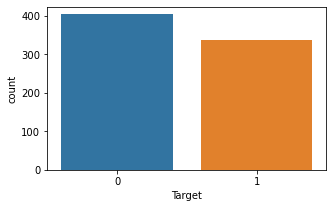

In [27]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=final,x='Target')

In [28]:
submission = pd.DataFrame({
                           "Emp_ID": EId,
                           "Target": final.Target
                           })
submission.to_csv('ResultHC.csv', index=True)